In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("BNB_USD.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-01,10.356931,11.607489,10.325634,11.393217,11.393217,117838677
1,2019-03-02,11.384693,11.915753,10.960816,11.869744,11.869744,120807894
2,2019-03-03,11.845305,11.964979,11.352064,11.537903,11.537903,89868246
3,2019-03-04,11.538013,11.599405,11.070543,11.545945,11.545945,89421231
4,2019-03-05,11.520388,13.841443,11.520388,13.811967,13.811967,237026335


In [3]:
df = df[['Close']]
df = df.reset_index(drop=True)
df

,Close
0,11.393217
1,11.869744
2,11.537903
3,11.545945
4,13.811967
...,...
1889,560.526733
1890,587.010437
1891,585.846558
1892,592.140381


In [4]:
train_size = int(0.8 * len(df))
test_size = int(0.2 * len(df))
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [5]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [7]:
# Chuẩn bị dữ liệu kiểm thử
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

In [9]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Đánh giá hiệu suất mô hình
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R^2: {r2}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")

R^2: -1.8436838652908638
MSE: 42166.76320814334
MAE: 188.81870831762285


In [11]:
# Quá trình tạo chỉ mục dự đoán 30 ngày tiếp theo
last_index =  df.index[-1]
last_data_30 = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

y_next_30_days = model.predict(x_next_30_days)

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[551.29785655 551.60515342 551.91245029 552.21974716 552.52704403
 552.83434089 553.14163776 553.44893463 553.7562315  554.06352836
 554.37082523 554.6781221  554.98541897 555.29271584 555.6000127
 555.90730957 556.21460644 556.52190331 556.82920018 557.13649704
 557.44379391 557.75109078 558.05838765 558.36568452 558.67298138
 558.98027825 559.28757512 559.59487199 559.90216886 560.20946572]


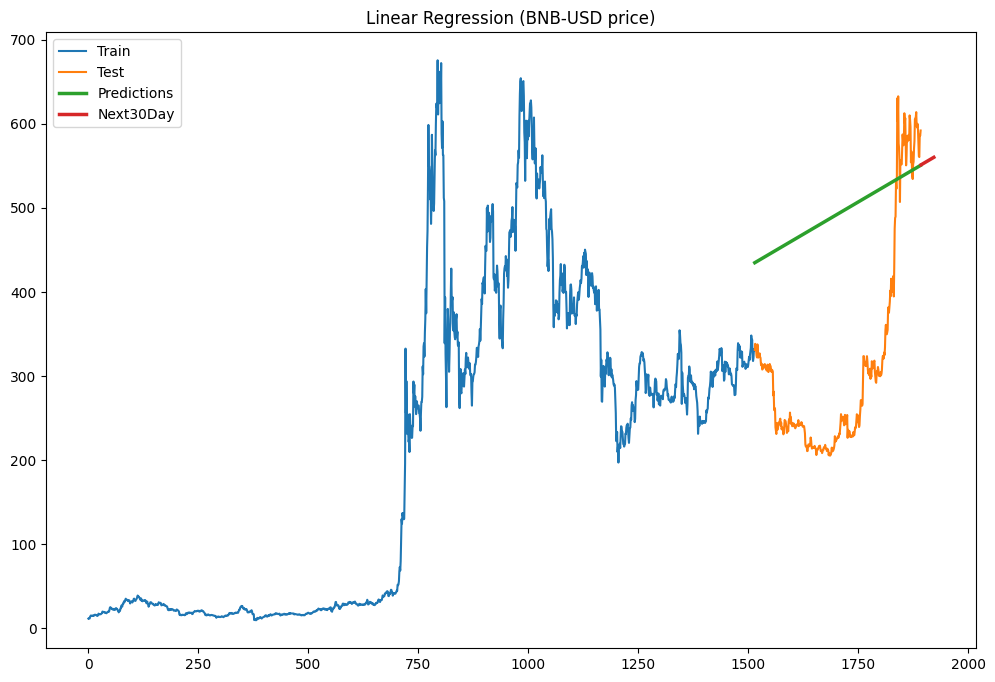

In [12]:
plt.figure(figsize=(12, 8))
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred, linewidth=2.5)
plt.plot(last_data_30, y_next_30_days, linewidth=2.5)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.title(f"Linear Regression (BNB-USD price)")
plt.savefig('LR_BNB.png')
plt.show()